## 04 Machine Learning_ Regression Analysis

#### This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis
Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [11]:
# Import data set
path=r'/Users/dariaperestiuk/Desktop/HW Data Analyst/Oil Price Project'
df=pd.read_csv(os.path.join(path, '01 Data', 'Prepared Data', 'cleaned_merged_with_oilprice.csv'))

### 2. Data cleaning

In [12]:
df.columns

Index(['Unnamed: 0', 'Country', 'Country Group', 'OPEC Member', 'Year',
       ' Crude oil production', 'Oil demand', 'Crude oil exports',
       'Imports of crude oil', 'GDP', 'Oil Price'],
      dtype='object')

In [13]:
df.head()

,Unnamed: 0,Country,Country Group,OPEC Member,Year,Crude oil production,Oil demand,Crude oil exports,Imports of crude oil,GDP,Oil Price
0,0,Algeria,Africa,Yes,1987,648.225,174.504877,240.000000,8.142247,6.674227e+10,18.53
1,1,Angola,Africa,Yes,1987,357.655,29.591633,342.400000,0.000000,6.684492e+09,18.53
2,2,Argentina,Latin America,No,1987,428.999,485.000000,NaN,NaN,1.111062e+11,18.53
3,3,Australia,OECD Asia Pacific,No,1987,485.449,661.000000,88.281205,85.471450,1.893760e+11,18.53
4,4,Azerbaijan,Other Eurasia,No,1987,258.857,NaN,NaN,NaN,NaN,18.53


In [14]:
df.shape

(8048, 11)

#### Missing values

In [15]:
# Check for missing values

df.isnull().sum()

Unnamed: 0                  0
Country                     0
Country Group            6392
OPEC Member                 0
Year                        0
 Crude oil production    6392
Oil demand               5969
Crude oil exports        6758
Imports of crude oil     6260
GDP                       925
Oil Price                   0
dtype: int64

In [ ]:
df['DataFrame Column'] = df['DataFrame Column'].fillna(0)

In [56]:
# Impute missing values for  Crude oil production with 0 for non oil producing countries 
df[' Crude oil production'] = df[' Crude oil production'].fillna(0)

In [57]:
# Last check for NaN
df[' Crude oil production'].isnull().sum()

0

#### Duplicates check

In [16]:
dups = df.duplicated()

In [17]:
dups.shape # No dups

(8048,)

#### Extreme values checks

/var/folders/b4/x0tbdjmd0x9bzv34th4mvgp40000gn/T/ipykernel_55547/1839480735.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' Crude oil production'], bins=30) # Shows extreme values
/Users/dariaperestiuk/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel=' Crude oil production', ylabel='Density'>

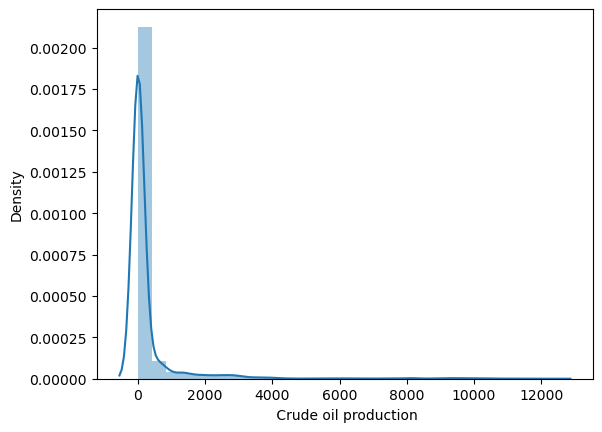

In [58]:
sns.distplot(df[' Crude oil production'], bins=30) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [59]:
# Check how many extreme values

df[df[' Crude oil production'] == 0]

,Unnamed: 0,Country,Country Group,OPEC Member,Year,Crude oil production,Oil demand,Crude oil exports,Imports of crude oil,GDP,Oil Price
10,10,Chad,Africa,No,1987,0.0,NaN,NaN,NaN,1.163427e+09,18.53
18,18,Equatorial Guinea,Africa,Yes,1987,0.0,0.5,0.000000,NaN,9.334585e+07,18.53
20,20,Ghana,Africa,No,1987,0.0,NaN,NaN,NaN,5.074830e+09,18.53
21,21,Guyana,Latin America,No,1987,0.0,NaN,NaN,NaN,3.545918e+08,18.53
37,37,Sudans,Africa,No,1987,0.0,NaN,0.000000,NaN,NaN,18.53
...,...,...,...,...,...,...,...,...,...,...,...
8043,8043,Trinidad & Tobago,NaN,No,2022,0.0,NaN,54.083333,0.000000,NaN,100.93
8044,8044,Eqautorial Guinea,NaN,No,2022,0.0,NaN,NaN,0.000000,NaN,100.93
8045,8045,Greece,NaN,No,2022,0.0,NaN,NaN,441.555628,NaN,100.93
8046,8046,Morocco,NaN,No,2022,0.0,NaN,NaN,0.000000,NaN,100.93


In [60]:
df[' Crude oil production'].mean() # Check the mean

292.2543091404506

In [61]:
df[' Crude oil production'].median() # Check the median

0.0

In [62]:
df[' Crude oil production'].max() # Check the max

12315.054999999998

### 3. Data prep for regression analysis 

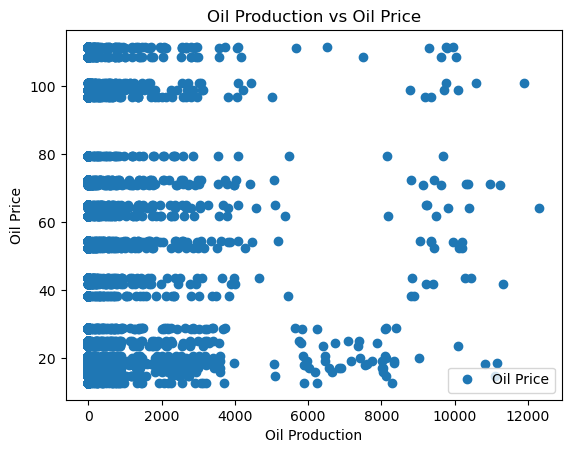

In [73]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = ' Crude oil production', y='Oil Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Oil Production vs Oil Price')  
plt.xlabel('Oil Production')  
plt.ylabel('Oil Price')  
plt.show()

In [74]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df[' Crude oil production'].values.reshape(-1,1)
y = df['Oil Price'].values.reshape(-1,1)

In [75]:
X

array([[648.225],
       [357.655],
       [428.999],
       ...,
       [  0.   ],
       [  0.   ],
       [  0.   ]])

In [76]:
y

array([[ 18.53],
       [ 18.53],
       [ 18.53],
       ...,
       [100.93],
       [100.93],
       [100.93]])

In [77]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression analysis

In [78]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [79]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [80]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

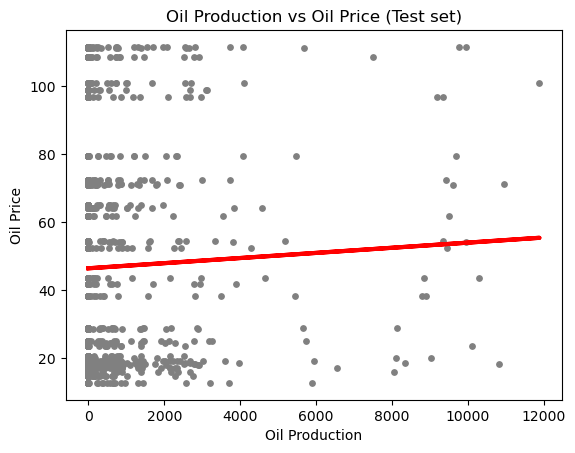

In [81]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Oil Production vs Oil Price (Test set)')
plot_test.xlabel('Oil Production')
plot_test.ylabel('Oil Price')
plot_test.show()

In [82]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [83]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00075478]]
Mean squared error:  1065.0038624646131
R2 score:  0.0016083278260976552


#### 1. The slope here means that as Oil Production increase, Oil Prices slightly increase too at a degree of 0.00075.
#### 2. MSE is quite large at 1065. From this, it’s safe to say that a regression may not be the best model to represent this data and can’t accurately predict the influence of Oil Production to Oil Prices. Actual and Predicted values output also proves that statement (see below).
#### 3. R2 score value closer to 0 indicate a poor model fit as well

In [84]:
y_predicted

array([[46.48931911],
       [46.48931911],
       [46.48931911],
       ...,
       [46.48931911],
       [46.48931911],
       [46.48931911]])

In [85]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,96.94,46.489319
1,64.30,46.489319
2,14.91,46.489319
3,65.16,46.489319
4,108.56,46.655557
5,19.11,46.489319
6,12.76,46.489319
7,54.57,46.489319
8,38.26,46.489319
9,20.64,46.489319


#### Compare how the regression fits the training set

In [86]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [87]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [88]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00075478]]
Mean squared error:  1067.8983488479025
R2 score:  0.0006304277641283607


#### The training set results only confirm that the relationship between Oil Production and Oil Price isn’t purely linear.

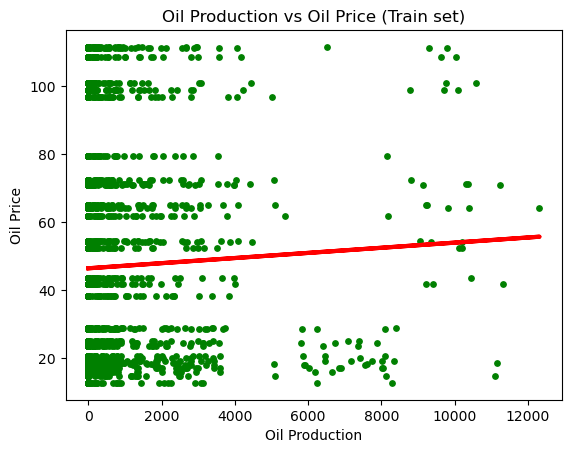

In [89]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Oil Production vs Oil Price (Train set)')
plot_test.xlabel('Oil Production')
plot_test.ylabel('Oil Price')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [63]:
# Clean the zero values from the "Crude oil production" variable observed during the consistency checks since 0s in high values represent non oil producing countries 

df_test = df[df[' Crude oil production'] > 0] 

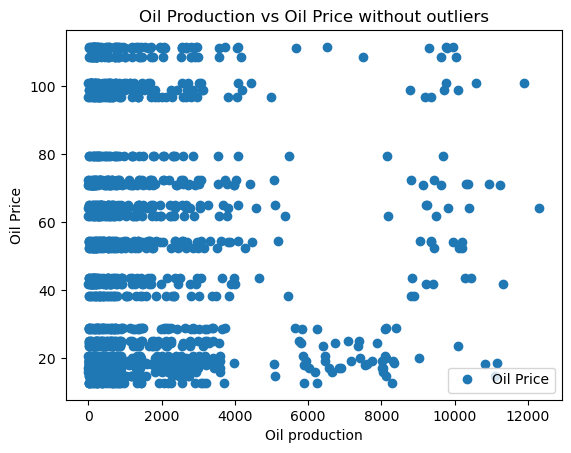

In [64]:
# See how the scatterplot looks without outliers.

df_test.plot(x = ' Crude oil production', y='Oil Price', style='o')  
plt.title('Oil Production vs Oil Price without outliers')  
plt.xlabel('Oil production')  
plt.ylabel('Oil Price')  
plt.show()

In [65]:
# Reshape again.

X_2 = df_test[' Crude oil production'].values.reshape(-1,1)
y_2 = df_test['Oil Price'].values.reshape(-1,1)

In [66]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [67]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [68]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [69]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [70]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00062945]]
Mean squared error:  1018.2433531708897
R2 score:  -0.0014385626741273416


#### We can see the highest density of points within the data, this just further confirms a single regression line as not being the most accurate prediction model and removing outliers did not affect the performance of our prediction model and the stats results prove that statement.

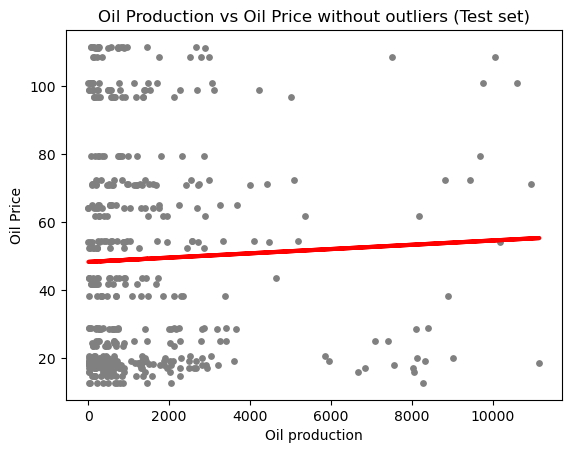

In [71]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Oil Production vs Oil Price without outliers (Test set)')
plot_test.xlabel('Oil production')
plot_test.ylabel('Oil Price')
plot_test.show()

In [72]:
data_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,96.94,53.018933
1,98.97,47.804211
2,17.02,47.722049
3,17.01,48.051762
4,111.63,48.180754
5,20.64,48.174136
6,108.56,48.282463
7,64.30,48.625319
8,71.34,49.202199
9,17.90,48.171674


#### Conclusion: Performing regression analysis on two variables, Oil Production and Oil Price proves that our hypothesis is false. 
#### Hypothesis - when OPEC reduces its export quotas, member countries must decrease their oil production, then it is leading to a decrease in global supply. This reduction in supply can put upward pressure on oil prices.